In [185]:
from pandas import DataFrame, read_csv
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt
import pandas as pd 
import sys 
import matplotlib 
import numpy as np


%matplotlib inline

country_KPI = "/home/ubuntu/workspace/country_csv.csv"
country_values = "/home/ubuntu/workspace/country_csv_values.csv"

In [186]:

kpi_data = pd.read_excel('C:\\Users\\PradeepB\\Machine Learning\\HCL Hackathon\\FINAL\\Customer-country_data_5-5.xlsx',header=3)

kpi = np.array(kpi_data)
kpi_data['Customer'] = kpi_data['Customer'].fillna(method='ffill')
kpi_data['Country'] = kpi_data['Country'].fillna(method='ffill')
kpi_data[2013] = kpi_data[2013].fillna(value=0)
kpi_data[2014] = kpi_data[2014].fillna(value=0)
kpi_data[2015] = kpi_data[2015].fillna(value=0)
kpi_data[50:100]
kpi_data = kpi_data.dropna()
kpi = np.array(kpi_data)



In [187]:

customer_country = pd.read_excel('C:\\Users\\PradeepB\\Machine Learning\\HCL Hackathon\\FINAL\\Customer-country_data_5-5.xlsx',header=9,sheetname='customer-country')
customer_country = customer_country.fillna(0)
customer_country = customer_country.replace({'\n': ''}, regex=True)
customer_country = customer_country[:730]

customer_country = customer_country.replace({',': ''}, regex=True)
customer_country = customer_country.fillna(value=0)
customer_country.dtypes
customer_country=customer_country.convert_objects(convert_numeric=True)
customer_country = customer_country.fillna(value=0)



C:\Users\PradeepB\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [188]:
a=np.array(customer_country)
country = a[:,:4]
b=(a[:,4:].sum(axis=1))
b=np.reshape(b,(b.shape[0],1))
b=np.array(b.T)
country=np.concatenate((country, b.T), axis=1)
count=np.empty([5])
a=count
for i in country:
    global count
    temp = i[0]
    i[0] = i[1]
    i[1] = temp
    count =np.vstack([count,i])
count = np.delete(count, [0], axis=0)


p = pd.DataFrame(count)
p = pd.DataFrame(count,columns=['Country','Company','KPI','Year','Value'])
k = pd.DataFrame(kpi,columns=['Country','Company','KPI','2013','2014','2015','Sum'])
p=p.sort_values(['Country','Company','KPI'], ascending=[True,True,True])



In [189]:
a=k.sort_values(['Country','Company','KPI'], ascending=[True,True,True])


In [190]:

p = pd.DataFrame(count)
p = pd.DataFrame(count,columns=['Country','Company','KPI','Year','Value'])
k = pd.DataFrame(kpi,columns=['Country','Company','KPI','2013','2014','2015','Sum'])
p=p.sort_values(['Country','Company','KPI'], ascending=[True,True,True])
p[p.Country=='UK'][p.Company=='FORD MOTOR'][p.KPI=='Credit terms']

res = DataFrame(columns=['Va'])
p.iloc[0].Country

j=0

for i in range(p.shape[0]):
    global res
    temp = p.iloc[i]
    
    a=(str(int(temp.Year)))

    res.loc[j]=(k[k.Country==temp.Country][k.Company==temp.Company][k.KPI==temp.KPI][a]*temp.Value).iloc[0]
   

    j=j+1
res[430:]
p=p.reset_index(drop=True)
p=p.join(res)



C:\Users\PradeepB\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\PradeepB\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [191]:
temp=pd.get_dummies(p,columns=['KPI','Year'])


In [192]:
del temp['Value']

In [193]:
data = kpi_data = pd.read_excel('C:\\Users\\PradeepB\\Machine Learning\\HCL Hackathon\\FINAL\\Opportunities_examples.xlsx')


In [194]:
data=data.convert_objects(convert_numeric=True)


C:\Users\PradeepB\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [195]:
new_X = data.filter(['Opp Type','Status','Region','Country','BU','Sector','Customer Group','Customer','Product','Payment Terms','Contract Term','Milestone','Ann Rev (€m)','Ann GP (€m)'], axis=1)
temp = temp.rename(columns={'Company': 'Customer Group'})
new_y = data.filter(['Prob to win %'])

In [196]:

temp2 = pd.get_dummies(new_X,columns=['Opp Type','Status','Region','BU','Sector','Customer','Product','Contract Term','Milestone'])



temp2.set_index(['Customer Group','Country'])

temp.set_index(['Customer Group','Country'])
temp3 = pd.merge(temp2, temp,  how='left', left_on=['Customer Group','Country'], right_on = ['Customer Group','Country'])


In [197]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [198]:

arr = ["KPI_Credit terms","KPI_DSO","KPI_Gross Profit",
    "KPI_Inventory Location Accuracy",
    "KPI_Lost Time Injury Frequency Rate",
    "KPI_On Time Delivery",
    "KPI_On Time Shipping","KPI_Shipping Accuracy",
    "KPI_Third party trade receivables",
    "KPI_Total Net Revenue"]
arr2 = ["Country","Customer Group","Va","KPI_Credit terms","KPI_DSO","KPI_Gross Profit",
    "KPI_Inventory Location Accuracy",
    "KPI_Lost Time Injury Frequency Rate",
    "KPI_On Time Delivery",
    "KPI_On Time Shipping","KPI_Shipping Accuracy",
    "KPI_Third party trade receivables",
    "KPI_Total Net Revenue"]
j=0
df = pd.DataFrame(columns=arr2)

z1=0
z2=0

while z1<temp.shape[0]:
    global j
    global z1,z2
    global df
    z2=z1
    while z1<temp.shape[0] and temp.iloc[z1][arr[j]]==1:
        z1=z1+1
    

    a=(pd.DataFrame([temp.iloc[z2]['Country']],columns=['Country']).sum())
    b=(pd.DataFrame([temp.iloc[z2]['Customer Group']],columns=['Customer Group']).sum())
    c=(temp[z2:z1].sum(numeric_only=True))
    result = pd.concat([a,b,c], axis=0)
    
    result[arr[j]] = result['Va']
    j=(j+1)%10
    del result['Year_2013']
    del result['Year_2014']
    del result['Year_2015']

    df=df.append(result, ignore_index=True)

df1=df

<ipython-input-198-e64ef8fed2b8>:24: SyntaxWarning: name 'z1' is used prior to global declaration
  global z1,z2


In [199]:
df = pd.DataFrame(columns=arr2)
for i in range(df1.shape[0]/10):

    a=(pd.DataFrame([df1.iloc[i*10]['Country']],columns=['Country']).sum())
    b=(pd.DataFrame([df1.iloc[i*10]['Customer Group']],columns=['Customer Group']).sum())
    c=(df1[i*10:(i+1)*10].sum(numeric_only=True))
    result = pd.concat([a,b,c], axis=0)
    df=df.append(result,ignore_index=True)

    del df['Va']
df


,Country,Customer Group,KPI_Credit terms,KPI_DSO,KPI_Gross Profit,KPI_Inventory Location Accuracy,KPI_Lost Time Injury Frequency Rate,KPI_On Time Delivery,KPI_On Time Shipping,KPI_Shipping Accuracy,KPI_Third party trade receivables,KPI_Total Net Revenue
0,Brazil,FORD MOTOR,984.318000,688.910819,-1.529908e+06,3387.093540,0.027290,3218.153816,3400.000000,3388.457811,5.275696e+07,5.276040e+07
1,Brazil,HEWLETT PACKARD,1656.203216,1681.282263,5.261749e+06,3391.477376,0.025423,3218.153816,3394.287721,3399.329820,1.021038e+08,5.223733e+07
2,Brazil,PEPSICO,1525.876000,1804.947152,1.212804e+06,3395.099397,0.238711,3218.153816,3339.302077,3310.791455,2.296078e+07,1.188354e+07
3,Brazil,PROCTER & GAMBLE,1194.151000,1557.677844,2.322390e+05,3387.413855,0.079348,3400.000000,3384.126577,3397.891988,5.862383e+07,3.359418e+07
4,Brazil,UNILEVER,2674.606000,2290.082584,8.857556e+06,3393.441573,0.074294,3361.357703,3378.525849,3397.353578,2.145362e+08,8.399421e+07
5,China,FORD MOTOR,1302.325813,1321.992091,1.878754e+06,3395.358693,0.030815,3361.357703,3399.968776,3399.750124,2.664188e+07,1.475519e+07
6,China,HEWLETT PACKARD,1548.857480,2295.621178,1.190012e+06,3399.791139,0.000000,3361.357703,3396.257337,3399.993629,8.165913e+07,3.120920e+07
7,China,PEPSICO,1140.000000,780.726613,1.175447e+04,2199.859609,0.000000,2169.530298,2196.552903,2200.000000,4.528641e+04,3.250112e+04
8,China,PROCTER & GAMBLE,120.000000,180.793613,5.186492e+03,3396.613105,0.143376,3361.357703,3395.071816,3400.000000,1.814720e+04,1.425173e+04
9,China,UNILEVER,2167.097394,2099.568386,4.872772e+06,3396.613105,0.143376,3361.357703,3395.071816,3400.000000,1.010692e+08,4.265776e+07


In [200]:
def get_yearvar(year):
    import requests
    import numpy as np
    total = list()
    url = 'https://www.quandl.com/api/v3/datasets/SSE/DPW.json?start_date='+str(year)+'-01-01&end_date='+str(year+1)+'-01-01'
    response = requests.get(url)
    if response.status_code != 200:
        return None
    data = response.json()
    for item in data['dataset']['data']:
        if item[0].find(str(year)) == -1:
            continue;
        total.append(item[1])
    return np.var(total)


In [201]:
data = kpi_data = pd.read_excel('C:\\Users\\PradeepB\\Machine Learning\\HCL Hackathon\\FINAL\\Opportunities_examples.xlsx')
data=data.replace(to_replace='HEWLETT PACKARD ENTERPRISE',value='HEWLETT PACKARD')
data=data.convert_objects()
data.dtypes
new_X = data.filter(['Opp Type','Status','Region','Country','Sector','Customer Group','Product','Contract Term','Payment Terms','Milestone','Ann Rev (€m)','Ann GP (€m)'], axis=1)
temp = temp.rename(columns={'Company': 'Customer Group'})
new_y = data.filter(['Prob to win %'])

new_X = pd.merge(new_X, df,  how='left', left_on=['Customer Group','Country'], right_on = ['Customer Group','Country'])

new_X=pd.get_dummies(new_X,columns=['Opp Type','Status','Region','Sector','Product','Country','Customer Group','Milestone','Contract Term'])
new_X=new_X.fillna(0)
new_y=new_y.fillna(0)
new_X['Stock Variance'] = pd.Series(np.full(65, fill_value = get_yearvar(2015)))


C:\Users\PradeepB\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [202]:
col=[ 
"KPI_Credit terms",

"KPI_Gross Profit",
"KPI_Inventory Location Accuracy",
"KPI_Lost Time Injury Frequency Rate",
"KPI_On Time Delivery",
"KPI_On Time Shipping",

"KPI_Third party trade receivables",
"KPI_Total Net Revenue",
    
"Milestone_Closed - Canceled",
"Milestone_Closed - Lost",
"Milestone_Contract Signed",
"Milestone_Customer commitment– Move to gain",
"Milestone_Data quality assessment conducted",
"Milestone_Early Lead",
"Milestone_Potential Opportunity",
"Milestone_Proposal (incl. COO & COS) signed off",
"Milestone_Proposal and solution fit presented",
"Milestone_Qualified and signed off by Sponsor",
"Milestone_Shortlisted",
"Milestone_Verbal Customer Commitment Received",
    

    
"Contract Term_1-2 Years",
"Contract Term_2-3 Years",
"Contract Term_3-5 Years",
"Contract Term_7+ Years",
"Contract Term_< 1 Year"
    
    ]

In [203]:
def myround(x, base=5):
    return int(base * round(float(x)/base))



In [204]:
new_X=new_X.fillna(0)

new_y =new_y.fillna(0)
te=new_X.as_matrix(columns=col)
new = new_X.filter(col, axis=1)
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
X_train, X_test, y_train, y_test = train_test_split(new, new_y, random_state=1999)
regr=linear_model.LinearRegression()
R1=regr
regr.fit(X_train,y_train)


print(regr.score(X_test,y_test))
l1_pred=regr.predict(X_test)
l11_pred=regr.predict(X_train)
yy_train = y_train
yy_test = y_test

0.764112716567


In [205]:
print(X_train.shape)

(48, 24)


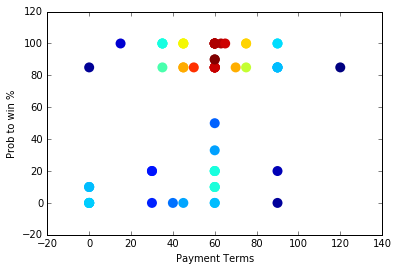

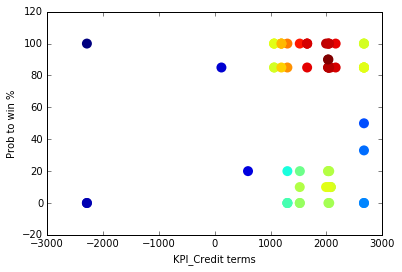

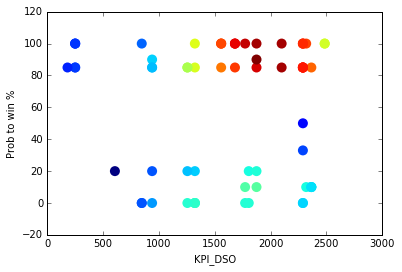

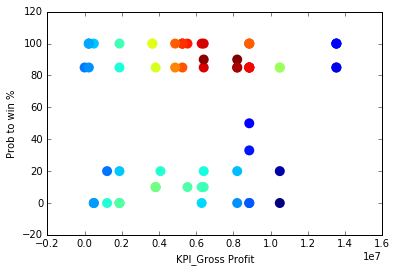

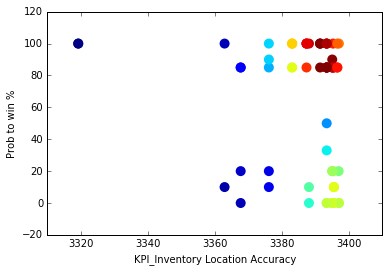

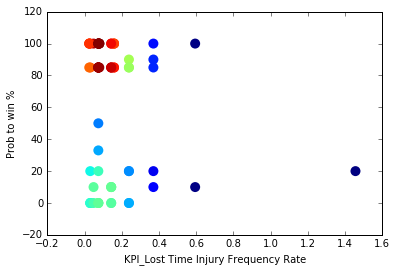

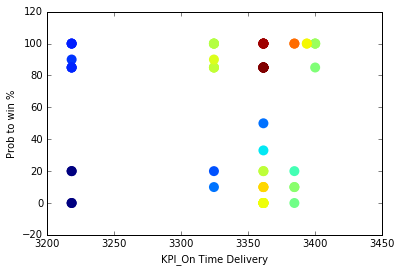

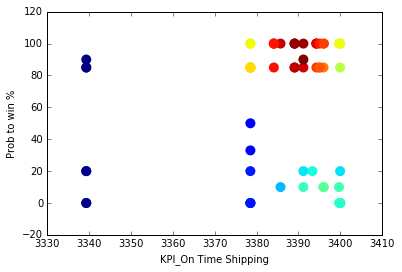

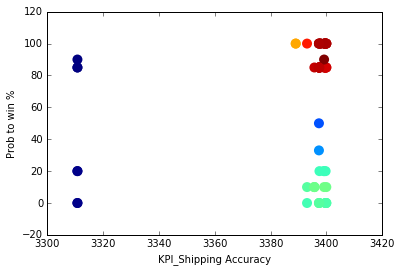

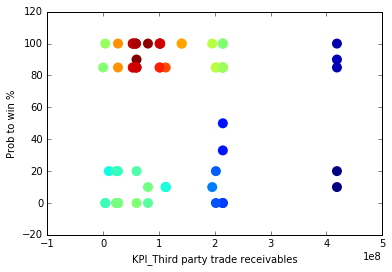

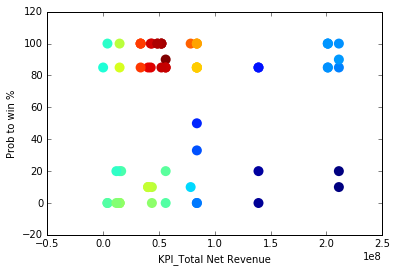

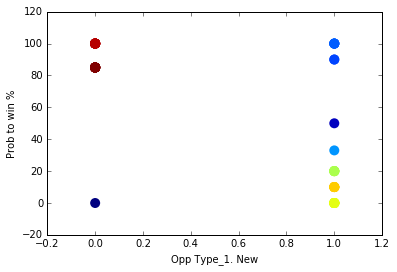

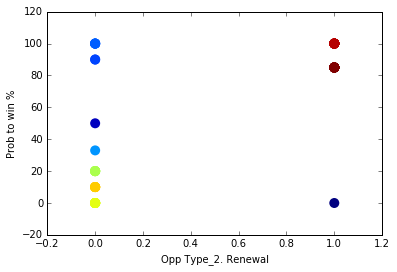

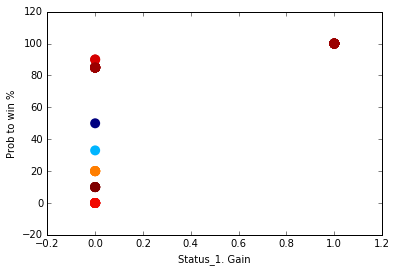

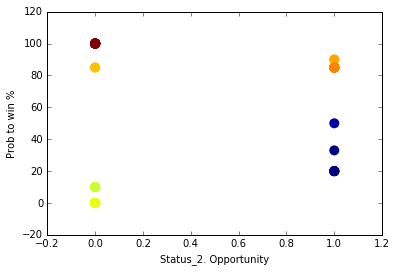

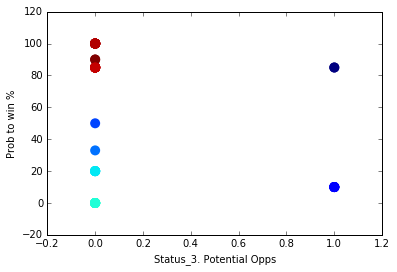

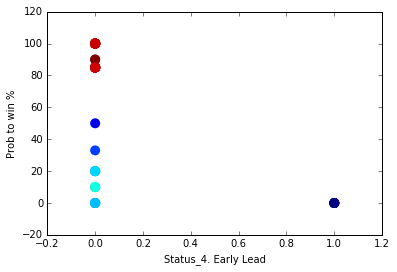

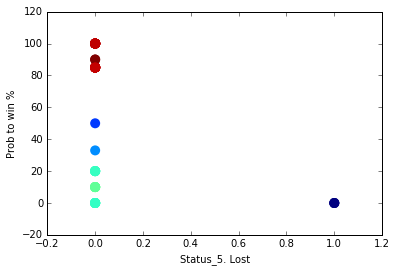

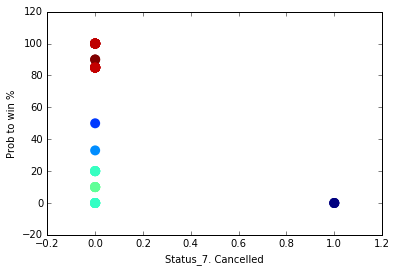

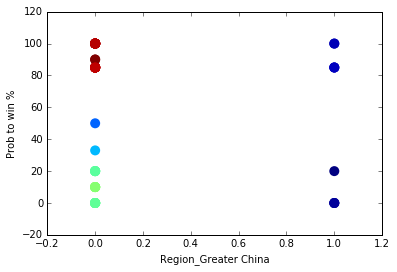

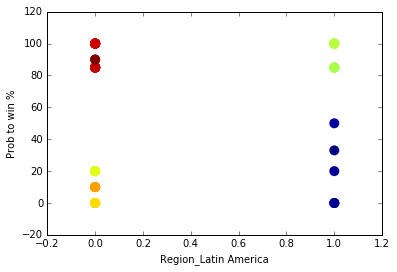

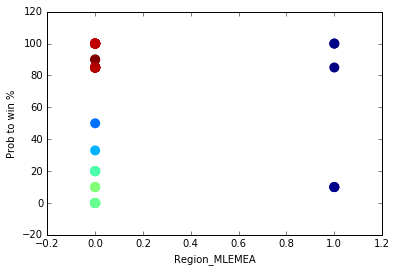

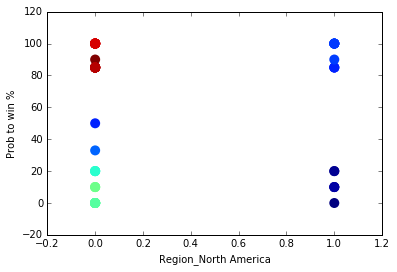

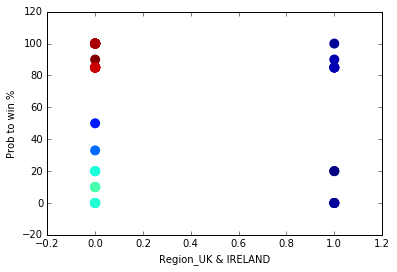

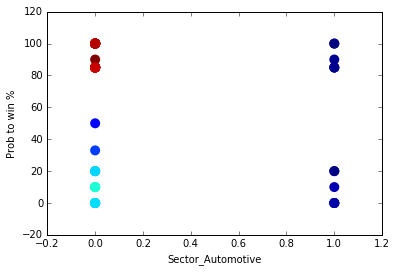

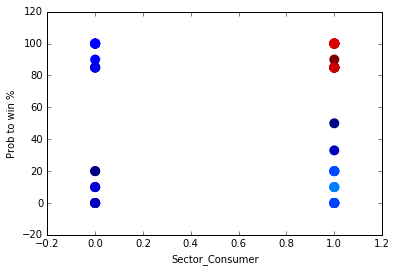

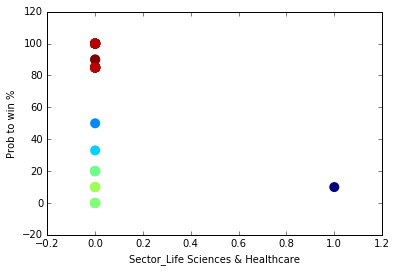

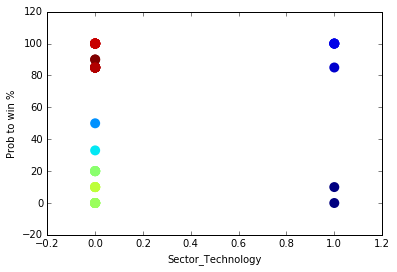

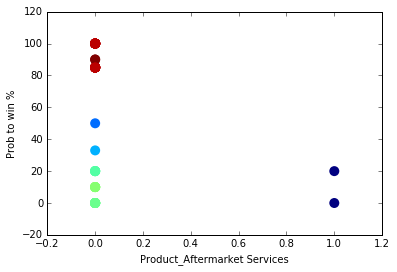

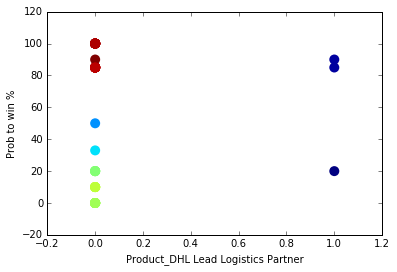

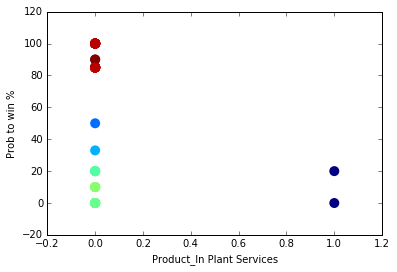

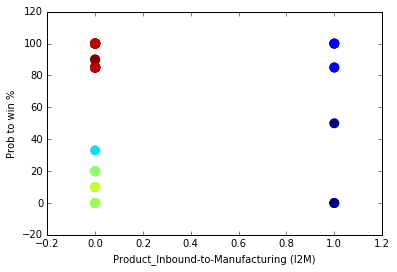

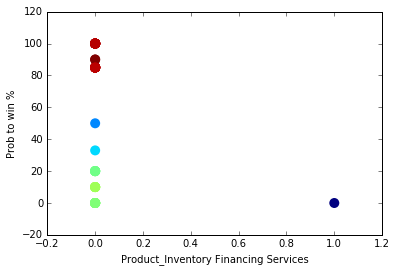

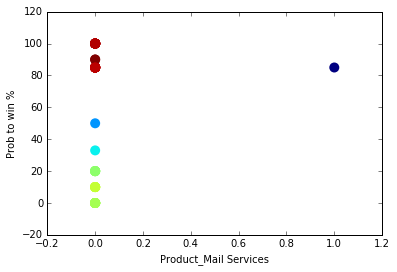

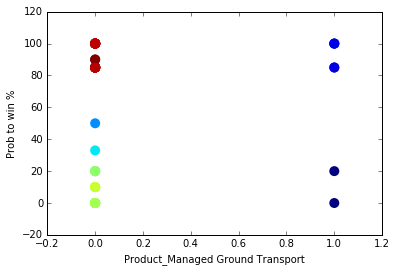

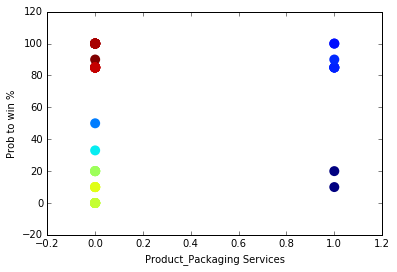

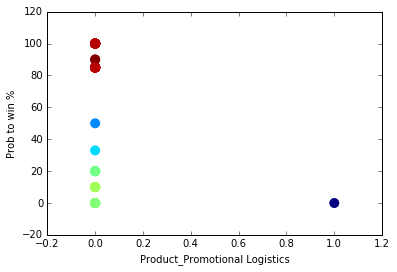

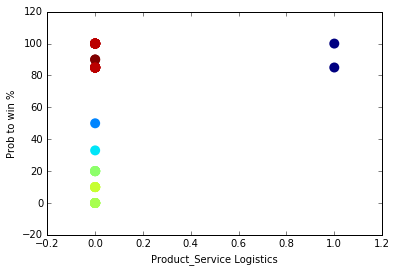

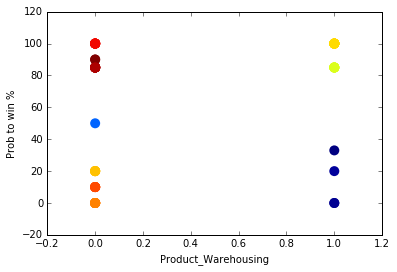

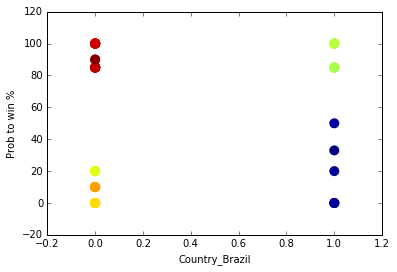

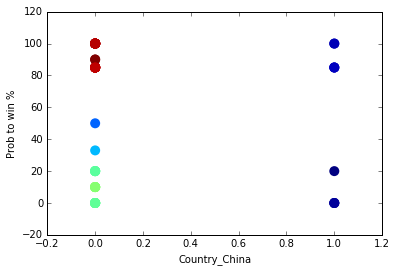

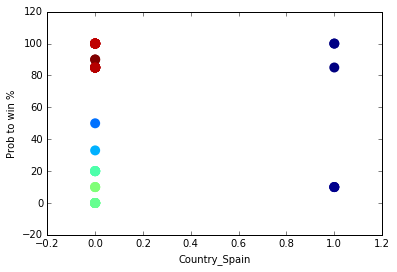

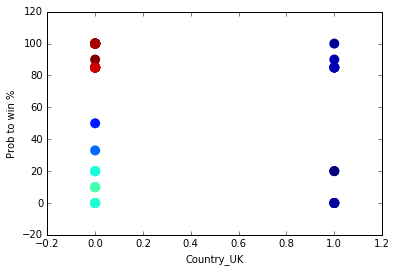

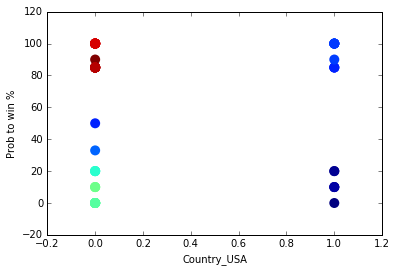

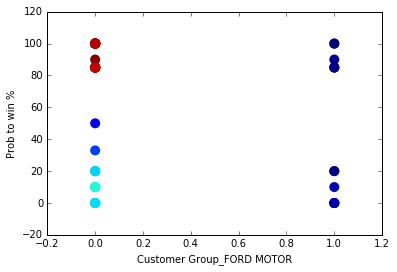

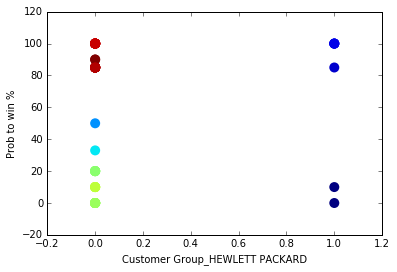

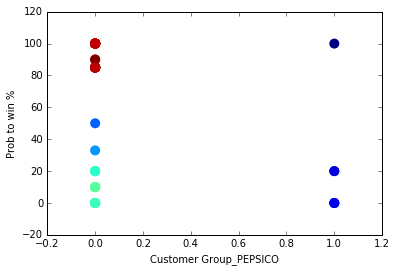

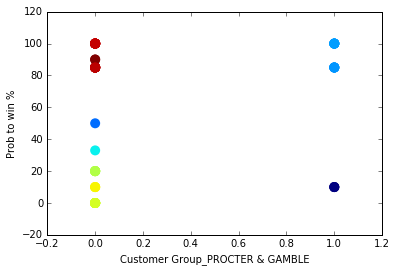

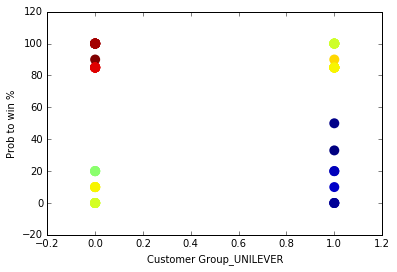

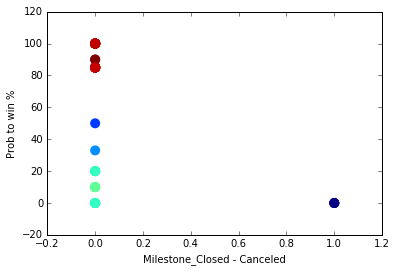

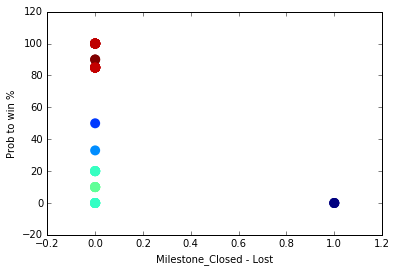

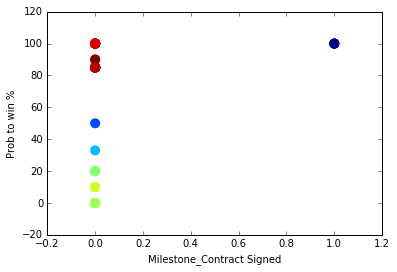

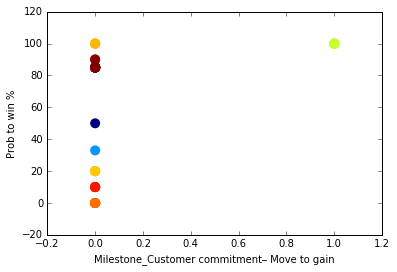

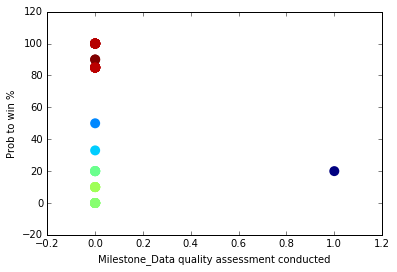

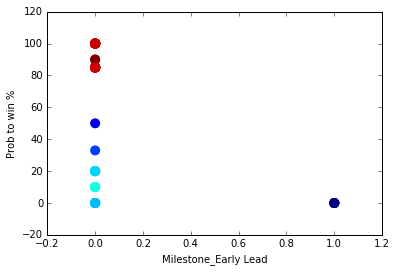

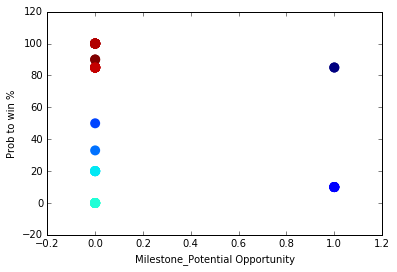

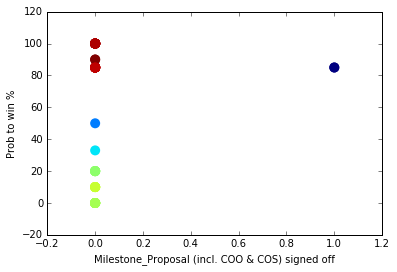

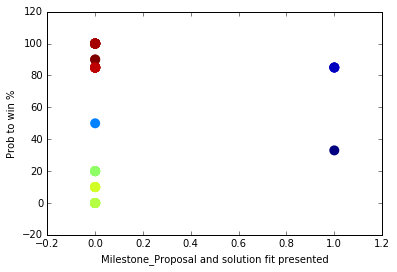

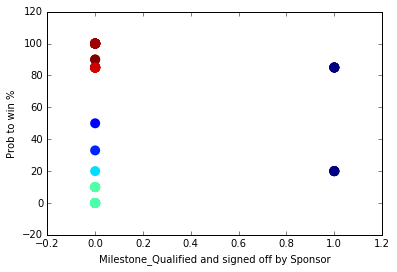

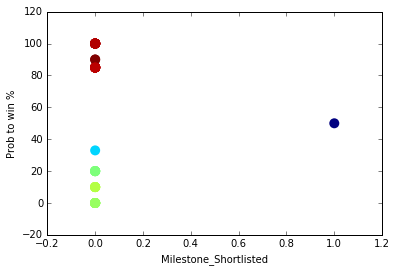

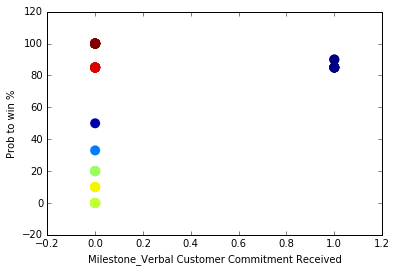

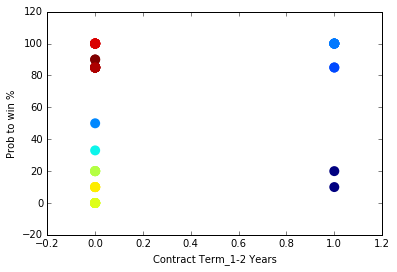

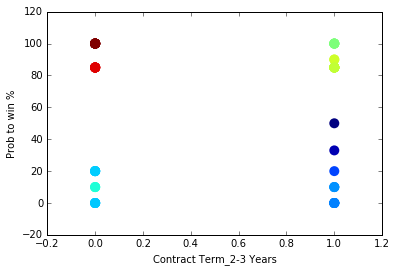

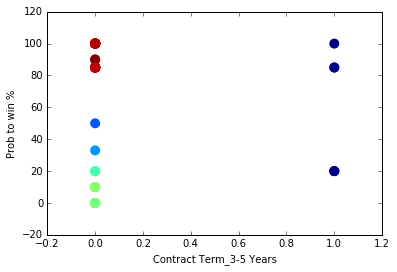

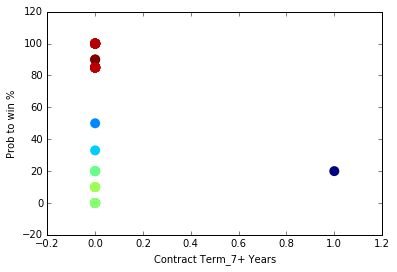

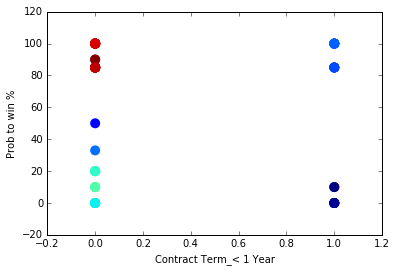

LinAlgError: singular matrix

In [242]:
# Dark colours indicate lower density 
# Bright colours indicate higher density
for key in new_X.keys():
    x = new_X[key]
    y = new_y['Prob to win %']
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    fig, ax = plt.subplots()
    ax.scatter(x, y, c=z, s=100, edgecolor='')
    plt.ylabel('Prob to win %')
    plt.xlabel(key)
    plt.show()
#     plt.close()

In [207]:
regr.score(X_test,y_test)

0.7641127165670204

In [208]:
col=[
    
"Opp Type",
"Status_1. Gain",
"Status_2. Opportunity",
"Status_3. Potential Opps",
"Status_4. Early Lead",
"Status_5. Lost",
"Status_7. Cancelled"
    

    
    ]
new_X=new_X.fillna(0)

new_y =new_y.fillna(0)
te=new_X.as_matrix(columns=col)
new = new_X.filter(col, axis=1)
X_train, X_test, y_train, y_test = train_test_split(new, new_y, random_state=1999)

In [209]:
X_train

,Status_1. Gain,Status_2. Opportunity,Status_3. Potential Opps,Status_4. Early Lead,Status_5. Lost,Status_7. Cancelled
32,0.0,0.0,1.0,0.0,0.0,0.0
42,0.0,0.0,0.0,1.0,0.0,0.0
46,1.0,0.0,0.0,0.0,0.0,0.0
34,0.0,1.0,0.0,0.0,0.0,0.0
50,0.0,1.0,0.0,0.0,0.0,0.0
24,0.0,1.0,0.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,1.0,0.0,0.0,0.0
56,1.0,0.0,0.0,0.0,0.0,0.0
48,0.0,1.0,0.0,0.0,0.0,0.0


In [210]:
r= linear_model.LogisticRegression()
R2=r
r.fit(X_train,y_train)
r.score(X_test,y_test)

C:\Users\PradeepB\Anaconda2\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.82352941176470584

In [211]:
l22_pred=r.predict(X_train)

In [212]:
l11_pred.shape

(48L, 1L)

In [213]:
l22_pred.shape

(48L,)

In [214]:
l2_pred=r.predict(X_test)
l22_pred=r.predict(X_train)
l2_pred=l2_pred.reshape(17,1)
l22_pred=l22_pred.reshape(48,1)
con=np.concatenate((l11_pred,l22_pred),axis=1)
fi_X_train, fi_X_test, fi_y_train, fi_y_test = train_test_split(con, yy_train, random_state=2)
regr=linear_model.LinearRegression()
R3=regr
regr.fit(fi_X_train,fi_y_train)

print "The final score for Probability to win % model is",regr.score(fi_X_test,fi_y_test)*100,"%"

The final score for Probability to win % model is 94.5483170237 %


In [215]:
churnArr=[]

def fun(x):
    for i in x:
        if i[0]<0:
            print 0
            churnArr.append(100)
        elif i[0]>100:
            print 100
            churnArr.append(0)
        else:
            print int(5 * round(float(i[0])/5))
            churnArr.append(int(5 * round(float(i[0])/5)))

In [216]:
fun(regr.predict(fi_X_test))

100
50
0
0
100
100
5
100
50
25
100
75


In [217]:
fi_y_test

,Prob to win %
13,100
41,50
23,0
9,0
53,100
43,100
0,0
28,100
55,20
32,10


In [218]:
print "Churn Rate of the Company is: ",np.mean(churnArr)

Churn Rate of the Company is:  50.4166666667


In [244]:
def fetFun(KPI_Credit_terms,
KPI_Gross_Profit,
KPI_Inventory_Location_Accuracy,
KPI_Lost_Time_Injury_Frequency_Rate,
KPI_On_Time_Delivery,
KPI_On_Time_Shipping,
KPI_Third_party_trade_receivables,
KPI_Total_Net_Revenue,Opp,
Milestone,Contract_terms,Status):
    KPI=["KPI_Credit terms",

    "KPI_Gross Profit",
    "KPI_Inventory Location Accuracy",
    "KPI_Lost Time Injury Frequency Rate",
    "KPI_On Time Delivery",
    "KPI_On Time Shipping",

    "KPI_Third party trade receivables",
    "KPI_Total Net Revenue"]
    
    Mile = ["Closed - Canceled",
    "Closed - Lost",
    "Contract Signed",
    "commitment– Move to gain",
    "Data quality assessment conducted",
    "Early Lead",
    "Potential Opportunity",
    "Proposal (incl. COO & COS) signed off",
    "Proposal and solution fit presented",
    "Qualified and signed off by Sponsor",
    "Shortlisted",
    "Verbal Customer Commitment Received"]
    
    Stat = ["1. Gain",
    "2. Opportunity",
    "3. Potential Opps",
    "4. Early Lead",
    "5. Lost",
    "7. Cancelled"]
    
    contTe=["1-2 Years",
    "2-3 Years",
    "3-5 Years",
    "7+ Years",
    "1 Year"]
    
    opp = ["1. New","2. Renewal"]
    
    arr1=[]
    arr1.append(KPI_Credit_terms)
    arr1.append(KPI_Gross_Profit)
    arr1.append(KPI_Inventory_Location_Accuracy)
    arr1.append(KPI_Lost_Time_Injury_Frequency_Rate)
    arr1.append(KPI_On_Time_Delivery)
    arr1.append(KPI_On_Time_Shipping)
    arr1.append(KPI_Third_party_trade_receivables)
    arr1.append(KPI_Total_Net_Revenue)
    
    for i in Mile:
        if i == Milestone:
            arr1.append(1)
        else:
            arr1.append(0)
    for i in contTe:
        if i == Contract_terms:
            arr1.append(1)
        else:
            arr1.append(0)

    
    arr2 = []
    
    for i in Stat:
        if i == Status:
            arr2.append(1)
        else:
            arr2.append(0)
    
#     print((pd.DataFrame(data=arr1,index=col).shape))
    del arr1[-1]
#     print(len(arr1))
#     print(arr1)
    a=(R1.predict(arr1))
    print(a)
    b=(R2.predict(arr2))
    return(R3.predict([a[0],b[0]]))[0][0]
    

In [245]:
fetFun(984.31,-1.5e+06,3387.0935,0.027290,3218.1538,3400.00,3388.457,5.275e+07,"1. New","Closed - Lost","< 1 Year","5. Lost")

[[ 8.39605181]]


C:\Users\PradeepB\Anaconda2\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\PradeepB\Anaconda2\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\PradeepB\Anaconda2\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it c

9.650129267033746

In [225]:
KPI=["KPI_Credit terms",

"KPI_Gross Profit",
"KPI_Inventory Location Accuracy",
"KPI_Lost Time Injury Frequency Rate",
"KPI_On Time Delivery",
"KPI_On Time Shipping",

"KPI_Third party trade receivables",
"KPI_Total Net Revenue"]

Mile = ["Closed - Canceled",
"Closed - Lost",
"Contract Signed",
"commitment– Move to gain",
"Data quality assessment conducted",
"Early Lead",
"Potential Opportunity",
"Proposal (incl. COO & COS) signed off",
"Proposal and solution fit presented",
"Qualified and signed off by Sponsor",
"Shortlisted",
"Verbal Customer Commitment Received"]

Stat = ["1. Gain",
"2. Opportunity",
"3. Potential Opps",
"4. Early Lead",
"5. Lost",
"7. Cancelled"]

contTe=["< 1 Year"
    "1-2 Years",
"2-3 Years",
"3-5 Years",
"7+ Years",
"1 Year"]

opp = ["1. New","2. Renewal"]

In [249]:
from Tkinter import *
import tkMessageBox
 



master = Tk("Customer Churning Probability Prediction")
master.minsize(width=400, height=600)
class ABC(Frame):
    def __init__(self, master=None):
        Frame.__init__(self, master)
        self.pack() 
app = ABC(master=master)
app.master.title("Customer Churning Probability Calculator")
KPIs = []
for i in KPI:
    w = Label(master, text=i)
#     w.grid(row=1, column=1)
    w.pack()
    T = Text(master, height=1, width=30)
    T.pack()
    T.insert(END, "")
    KPIs.append(T)

w = Label(master, text="Enter the Milestone")

w.pack()
OPTIONS = Mile
variable1 = StringVar(master)
variable1.set(OPTIONS[0]) # default value

w1 = OptionMenu(master, variable1, *OPTIONS)
w1.pack()

w = Label(master, text="Enter the Status")
w.pack()
OPTIONS = contTe
variable2 = StringVar(master)
variable2.set(OPTIONS[0]) # default value

w2 = OptionMenu(master, variable2, *OPTIONS)
w2.pack()

w = Label(master, text="Enter the Contract term")
w.pack()
OPTIONS = Stat
variable3 = StringVar(master)
variable3.set(OPTIONS[0]) # default value

w3 = OptionMenu(master, variable3, *OPTIONS)
w3.pack()

w = Label(master, text="Enter the Opportunity Type")
w.pack()
OPTIONS = opp
variable4 = StringVar(master)
variable4.set(OPTIONS[0]) # default value

w4 = OptionMenu(master, variable4, *OPTIONS)
w4.pack()


def callback():
    n0 = float(KPIs[0].get("1.0",END))
    n1 = float(KPIs[1].get("1.0",END))
    n2 = float(KPIs[2].get("1.0",END))
    n3 = float(KPIs[3].get("1.0",END))
    n4 = float(KPIs[4].get("1.0",END))
    n5 = float(KPIs[5].get("1.0",END))
    n6 = float(KPIs[6].get("1.0",END))
    n7 = float(KPIs[7].get("1.0",END))
    print(n0,n1,n2,n3,n4,n5,n6,n7)

    n8 = "Milestone_"+variable1.get()
    print(n8)
    n9 = "Contract Term_"+variable2.get()
    print(n9)
    n10 = "Status_"+variable3.get()
    print(n10)
    import tkMessageBox
    tkMessageBox.showinfo("Customer Churning Probabillity","Churning rate for the company is "+str(fetFun(n0,n1,n2,n3,n4,n5,n6,n7,"1",n8,n9,n10)))
    fetFun(n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10)
b = Button(text="click me", command=callback)
b.pack()

mainloop()
    


(1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0)
Milestone_Closed - Canceled
Contract Term_< 1 Year1-2 Years
Status_1. Gain
[[-195.22004791]]


C:\Users\PradeepB\Anaconda2\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\PradeepB\Anaconda2\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\PradeepB\Anaconda2\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it c